### 1 - LOAD DATA INTO JUPYTER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  
#display matplotlib pictures in say OP area and not as a POP UP

In [2]:
df = pd.read_excel('diabetes.xlsx')
df.head()
# head - give top 5 rows of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(df)

768

### 2 - Cleaning data
### 2.a finding null vals

In [4]:
df.isnull().values.any()

np.False_

### 2.b - finding duplicate or corelated columns
#### convert to null or NaN (Not a Number) -- then eith dropna() 'to delete' or fillna() 'to fill(mean or median value)'

In [5]:
def plot_corr(df,size=10):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

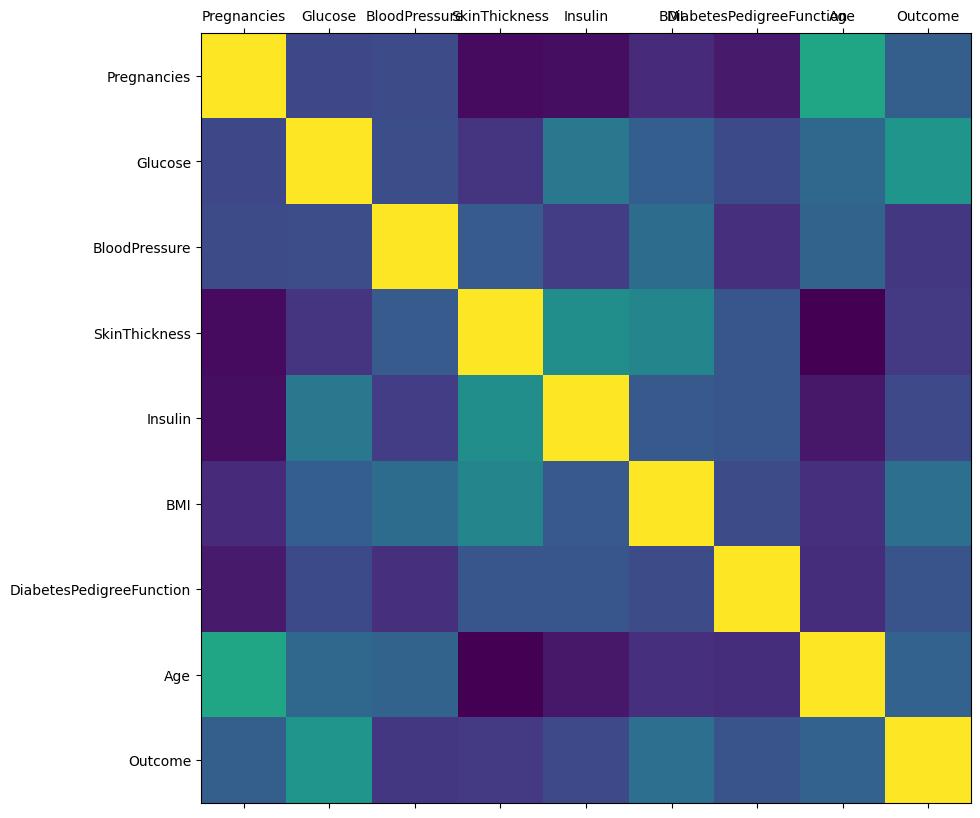

In [6]:
plot_corr(df)

### 2.c converting text to numbers
### ML wont understand text

#### Dictionary Mapping

In [7]:
# diabetes_map = {True:1,False:0}
# df['Outcome'] = df['Outcome'].map(diabetes_map)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.d - Handling Imbalance data 
### --- there are 2 methods to handle imbalance data: under-sampling (decrease majority data) and over-sampling (increase minority data).
####  in case of imbalance we use SMOTE technique to inrease Minority data samples.

### CHECKING the Proportion of the True and False values

In [9]:
# since we predictiong diabetes True Or False. we have to ensure our training data has equal proportions of Training sets.
# With diabetes and without diabetes, if we have too many rows of diabetes or vice versa the algo may not work well

# check true and false

num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print('true = ',(num_true/ (num_true+num_false))*100)
print('false = ',(num_false/ (num_true+num_false))*100)

true =  34.89583333333333
false =  65.10416666666666


### 3 - TRAIN TEST SPLIT

#### lets split our data for training and testing algo

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class_name = ['Outcome']
x = df[feature_col_names].values
y =df[predicted_class_name].values
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=split_test_size, random_state = 42)

In [12]:
print('# of rows in dataframe {0}'.format(len(df)))
print('# rows missing Pregnancies : {0}'.format(len(df.loc[df['Pregnancies'] == 0])))
print('# rows missing Glucose : {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('# rows missing BloodPressure : {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('# rows missing SkinThickness : {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('# rows missing Insulin : {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('# rows missing BMI : {0}'.format(len(df.loc[df['BMI'] == 0])))
print('# rows missing DiabetesPedigreeFunction : {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print('# rows missing Age : {0}'.format(len(df.loc[df['Age'] == 0])))

# of rows in dataframe 768
# rows missing Pregnancies : 111
# rows missing Glucose : 5
# rows missing BloodPressure : 35
# rows missing SkinThickness : 227
# rows missing Insulin : 374
# rows missing BMI : 11
# rows missing DiabetesPedigreeFunction : 0
# rows missing Age : 0


In [13]:
# Handling missing data
# replace with mean, mode
# or with expert suggestion 

# lerts go with mean or mode

In [14]:
# imputing with mean

from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0 ,strategy='mean')
# fill_0 = SimpleImputer(missing_values = 0, strategy = 'mean', axis = 0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [15]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

537 231 537 231


## 4 - TRAINING ALGOS / MODEL

### 1 . Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
# craete gaussian naive bayes model object and train it with data

nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

,priors,None
,var_smoothing,1e-09


In [17]:
# lets test the algo accuracy

nb_predict_train = nb_model.predict(x_train)
from sklearn import metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train,nb_predict_train)))

accuracy : 0.7542


#### - TESTING MODEL (Naive Bayes)

In [18]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test,nb_predict_test)))

accuracy : 0.7359


### ALGORITHMS PERFORMANCE

In [19]:
print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[118  33]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



#### FINAL observation of Naive Bayes algo ==> accuracy 73% and recall 81% 
#### type 2 error values should be less compared to type 1 error

### 2 . RANDOM FOREST ALGO

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())
rf_predict_test = rf_model.predict(x_test)
# training metrics
print("accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

accuracy : 0.7403


In [21]:
print('confusion matrix')
print((metrics.confusion_matrix(y_test, rf_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, rf_predict_test))

confusion matrix
[[119  32]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



### 3 . LOGISTIC REGRESSION ALGO

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced',C=0.1, random_state=42,max_iter=1000) 
# C is hyperparameter, class weight for balancing the data
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print('confusion matrix')
print((metrics.confusion_matrix(y_test, lr_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, lr_predict_test))

accuracy : 0.6970
confusion matrix
[[109  42]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.65      0.60        80

    accuracy                           0.70       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231



### -- FINAL CONCLUSION --

In [23]:
#           NB      RF      LR
#          ---     ---      ---   
# Accuracy  73%     74%     69%
# Type 1    33      32      42
# Type 2    28      28      28
# Recall    81      81      80
# Precision 78      79      72

#  AND THUS WE CAN SAY THAT THE RANDOM FOREST CLASSIFIER IS THE BEST CLASSIFIER IN THIS CASE.